# Homework 3: Lab November 20

<div style="text-align: center">
  <img src="markov_process.png" width="400" height="300">
</div>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Simulation of Markov Process

**a)**

In [2]:
states = np.asarray([1,2,3])

# Transition matrix:
P = np.asarray([
    [0.2, 0.7, 0.1],
    [0.2, 0.5, 0.3],
    [0.2, 0.4, 0.4],
])

**b)**

In [3]:
# Simulating one single realization of the process
np.random.seed(10)

T = 20 # Can set this to an arbitrary number of steps you need
X_0 = 1
curr_state = (states==X_0).astype(int)
print(X_0, "--->", end=" ")

for t in range(T):
    X_t = np.random.choice([1, 2, 3], p=curr_state @ P)
    curr_state = (states==X_t).astype(int)
    if t==T-1:
        print(X_t)
    else:
        print(X_t, "--->", end=" ")

1 ---> 2 ---> 1 ---> 2 ---> 3 ---> 2 ---> 2 ---> 1 ---> 2 ---> 1 ---> 1 ---> 2 ---> 3 ---> 1 ---> 2 ---> 3 ---> 3 ---> 3 ---> 2 ---> 3 ---> 3


# Stationary Distribution

**a)** Calculated in the attached pdf: "Lab_Nov20_Math_Calculations.pdf"


**b)**

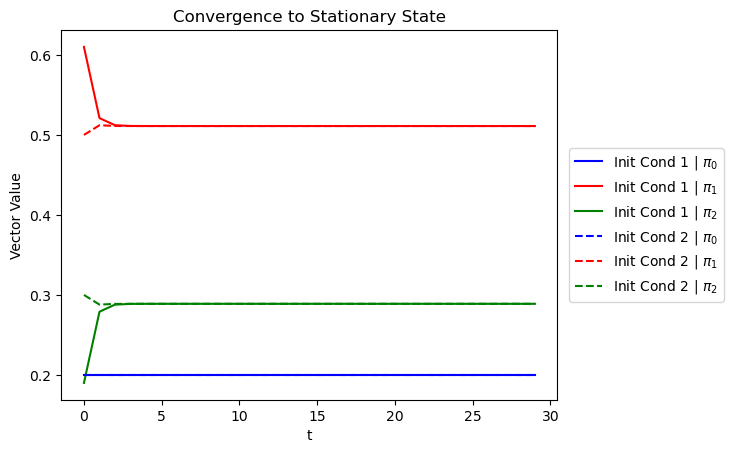

For initial condition 1: pi_T = [0.2        0.51111111 0.28888889]
For initial condition 2: pi_T = [0.2        0.51111111 0.28888889]


In [4]:
np.random.seed(10)

T = 30 # Taking 30 steps
pi0_1 = np.asarray([0.6,0.3,0.1]) # one initial condition
pi0_2 = np.asarray([0.1,0.7,0.2]) # second initial condition

piT_1 = [] # pi_inf for the first initial condition
piT_2 = [] # pi_inf for the second initial condition

for t in range(T):
    if t==0:
        piT_1.append(pi0_1 @ P)
        piT_2.append(pi0_2 @ P)
    else:
        piT_1.append(piT_1[-1] @ P)
        piT_2.append(piT_1[-1] @ P)

piT_1 = np.asarray(piT_1)
piT_2 = np.asarray(piT_2)

plt.plot(piT_1[:,0], 'b-', label="Init Cond 1 | $\pi_0$")
plt.plot(piT_1[:,1], 'r-', label="Init Cond 1 | $\pi_1$")
plt.plot(piT_1[:,2], 'g-', label="Init Cond 1 | $\pi_2$")
plt.plot(piT_2[:,0], 'b--', label="Init Cond 2 | $\pi_0$")
plt.plot(piT_2[:,1], 'r--', label="Init Cond 2 | $\pi_1$")
plt.plot(piT_2[:,2], 'g--', label="Init Cond 2 | $\pi_2$")
plt.legend(bbox_to_anchor=(1.35,0.7))
plt.xlabel("t")
plt.ylabel("Vector Value")
plt.title("Convergence to Stationary State")
plt.show()

print(r"For initial condition 1: pi_T =",piT_1[-1])
print(r"For initial condition 2: pi_T =",piT_2[-1])

As seen here, when starting from different initial conditions as we simulate the Markov Process it converges to the stationary distribution calculated in part a). That is $\pi_i \rightarrow \pi$

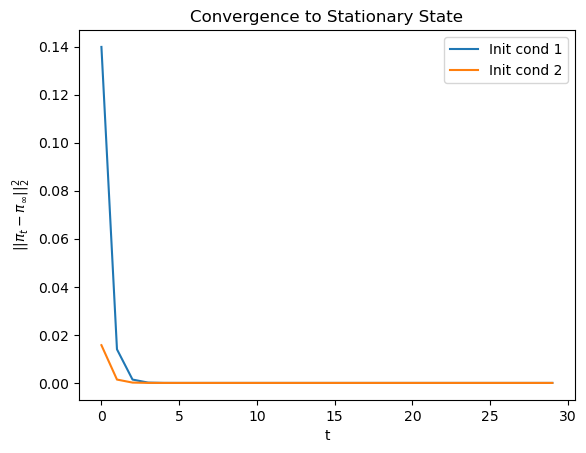

In [5]:
pi_inf = np.asarray([1/5.,23/45.,13/45.])[None,:]

plt.plot(np.linalg.norm(pi_inf - piT_1, axis=1), label="Init cond 1")
plt.plot(np.linalg.norm(pi_inf - piT_2, axis=1), label="Init cond 2")
plt.legend()
plt.xlabel("t")
plt.ylabel(r"$\vert\vert \pi_t - \pi_{\infty} \vert\vert^2_2$")
plt.title("Convergence to Stationary State")
plt.show()

# Absorbing State

**a)**

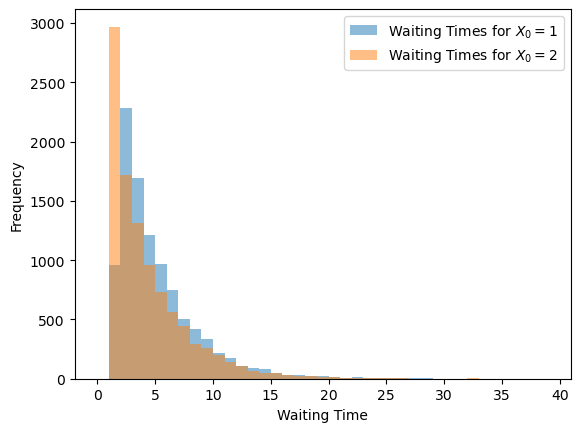

Mean Arrival Time to 3 from X0 = 1: 4.6319
Mean Arrival Time to 3 from X0 = 2: 3.8828


In [6]:
np.random.seed(10)

# New transition matrix with absorbing state:
P_new = np.asarray([
    [0.2, 0.7, 0.1],
    [0.2, 0.5, 0.3],
    [0., 0., 1.],
])

def calc_arrival_time3(Xt,P):
    '''
        Function to calculate the arrival time to the absorbing state (node 3)
        
        Args:
            Xt : Initial state as an int (X0)
            P  : The transition matrix
        Returns:
            T  : Arrival time to node 3
    '''
    curr_state = (states==Xt).astype(int)
    
    T = 0
    
    while Xt != 3:
        Xt = np.random.choice([1, 2, 3], p=curr_state @ P)
        curr_state = (states==Xt).astype(int)
        T+=1
        
    return T

X0_1 = 1
X0_2 = 2

nsim = 10000

waiting_times1 = [calc_arrival_time3(X0_1,P_new) for _ in range(nsim)]
waiting_times2 = [calc_arrival_time3(X0_2,P_new) for _ in range(nsim)]

plt.hist(waiting_times1, bins = np.arange(40), label="Waiting Times for $X_0=1$",  alpha=0.5)
plt.hist(waiting_times2, bins = np.arange(40), label="Waiting Times for $X_0=2$",  alpha=0.5)
plt.legend()
plt.xlabel("Waiting Time")
plt.ylabel("Frequency")
plt.show()

print("Mean Arrival Time to 3 from X0 = 1:", np.mean(waiting_times1))
print("Mean Arrival Time to 3 from X0 = 2:", np.mean(waiting_times2))

**b)** Calculated in the attached pdf: "Lab_Nov20_Math_Calculations.pdf"